# 简单例子

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)  # 等价于 `x = torch.arange(4.0, requires_grad=True)`
x.grad  # 默认值是None

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [9]:
x.grad == 4 * x

tensor([ True, False, False, False])

In [10]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

# 非标量的反向传播

In [11]:
# 对非标量调用`backward`需要传入一个`gradient`参数，该参数指定微分函数关于`self`的梯度。在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

# 分离计算

In [21]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad, x.grad == u

(tensor([0., 1., 4., 9.]), tensor([True, True, True, True]))

In [22]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

# Python 控制流梯度计算

In [24]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [51]:
a = torch.rand(size=(), requires_grad=True)
d = f(a)
d.backward()

In [52]:
a.grad == d/a

tensor(True)

# 练习

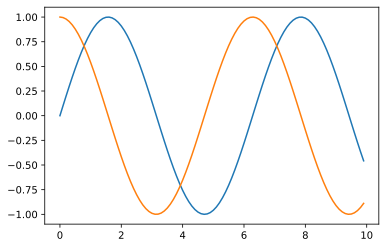

In [104]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0,10.0,0.1,requires_grad=True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)